<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [53]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
df = pd.read_csv('data/job_listings.csv')
df = df.drop(columns='Unnamed: 0')
df.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [54]:
# Oh, this looks bad
print(df['description'][0])

b"<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\n</li><li><p>Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><div>\nApply 

In [68]:
# I think I'm going to actually be sick.
# Alright, lets start by putting this into beautiful soup.
# I'm going to use the first entry as a sample to test the functions and
# such, before moving on to parsing the whole thing. I'll probably
# throw the results into a column in df afterwards, too.

import re

# this gives me a byte string stored in python as a regular string
def clean_text(text):
    soup = BeautifulSoup(text)
    text = soup.get_text()[2:-1]

    # I'm using regex to remove byte escapes, I don't care
    text = text.replace('\\n', ' ')
    text = re.sub('\\\\x[a-f 0-9]{2}', '', text)
    return text

print(clean_text(df['description'][0]))

Job Requirements: Conceptual understanding in Machine Learning models like Naive Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now


In [69]:
df['cleandesc'] = df['description'].apply(clean_text)

df.head()

,description,title,cleandesc
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in ...
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description As a Data Scientist 1, you wi..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA multiple locations 2+ years of ...


## 2) Use Spacy to tokenize the listings 

In [72]:
##### Your Code Here #####
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")

# set up tokenizer
tokenizer = Tokenizer(nlp.vocab)

tokens = []
# tokenize every cleaned description
for doc in tokenizer.pipe(df['cleandesc'], batch_size=500):
    doc_tokens = [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)]
    tokens.append(doc_tokens)

df['tokens'] = tokens

df.head()

,description,title,cleandesc,tokens
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in ...,"[Job, Requirements:, Conceptual, understand, M..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"Job Description As a Data Scientist 1, you wi...","[Job, Description, , Data, Scientist, 1,, hel..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,As a Data Scientist you will be working on con...,"[Data, Scientist, work, consult, business., re..."
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"$4,969 - $6,756 a monthContractUnder the gener...","[$4,969, $6,756, monthContractUnder, general, ..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Location: USA multiple locations 2+ years of ...,"[Location:, USA, , multiple, location, 2+, ye..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [83]:
##### Your Code Here #####
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', min_df=.03, ngram_range=(1,2))

docs = df['cleandesc'].copy()

vect.fit(docs)

dtm = vect.transform(docs)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

dtm

,000,10,100,12,20,2019,25,3rd,40,401,...,years hands,years industry,years professional,years relevant,years work,york,york city,youll,youll work,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,1,0,1,0,0
422,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

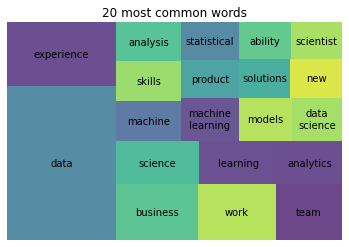

In [94]:
##### Your Code Here #####
# I don't know exactly how to go about this, so I figure I'll just sum
# the columns and see what that gets me
import squarify
import matplotlib.pyplot as plt
%matplotlib inline

wc = []
for col in dtm.columns:
    wc.append((col, sum(dtm[col])))

wc = pd.DataFrame(wc)
wc.columns = ['token', 'count']
wc = wc.sort_values(by='count', ascending=False)

squarify.plot(sizes=wc['count'][:20],
              label=wc['token'][:20].str.replace(' ', '\n'),
              alpha=0.8)
plt.title('20 most common words')
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [95]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

docs = df['cleandesc'].copy()

dtm = tfidf.fit_transform(docs)

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,00,000,04,10,100,1000,1079302,11,12,125,...,yrs,zenreach,zero,zeus,zf,zfs,zillow,zogsports,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [98]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

# fit nearest neighbors to the dtm generated by the tfidf
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

ideal_job = ['''
Looking for data science job. Uses python, SQL, git, conda, pipenv, etc. Relaxed working hours, no worry about time crunch. Looking for more of a development type job rather than a standard working one.

Hope to develop the new killer app or present interesting and important info for higher-ups.

Want to work somewhere near public transport, preferrably around the Seattle slash downtown area of Washington. Want to work in small to medium teams with friendly co-workers as well as have a healthy and active working relationship with bosses or higher-ups.
''']


new = tfidf.transform(ideal_job)

nn.kneighbors(new.todense())

(array([[1.33781953, 1.34475018, 1.35149984, 1.35188809, 1.35302986]]),
 array([[ 17,  89, 403, 371, 214]], dtype=int64))

In [99]:
# show most relevant result
df['cleandesc'][214]

'About Uber Were changing the way people think about transportation. Not that long ago we were just an app to request premium black cars in a few metropolitan areas. Now were a part of the logistical fabric of more than 600 cities around the world. Whether its a ride, a sandwich, or a package, we use technology to give people what they want, when they want it.  For the people who drive with Uber, our app represents a flexible new way to earn money. For cities, we help strengthen local economies, improve access to transportation, and make streets safer.  And thats just what were doing today. Were thinking about the future, too. With teams working on autonomous trucking and self-driving cars, were in for the long haul. Were reimagining how people and things move from one place to the next. Were changing the way people think about transportation. Not that long ago we were just an app to request premium black cars in a few metropolitan areas. Now were a part of the logistical fabric of mor

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 